In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import csv

pd.read_csv('CO2_DATA2.csv', sep=' ')
co2_data = pd.read_csv('CO2_DATA2.csv', sep=' ')

# I) NIVEAU MONDIAL 

9.05008
21.28784000000001
{1959: 9.05008, 1960: 5.93568, 1961: 9.08672, 1962: 6.7783999999999995, 1963: 8.75696, 1964: 5.569280000000001, 1965: 10.369119999999999, 1966: 7.437920000000002, 1967: 6.668480000000001, 1968: 4.543359999999998, 1969: 12.2744, 1970: 13.30032, 1971: 6.265440000000002, 1972: 11.065279999999998, 1973: 9.01344, 1974: 0.10992000000000246, 1975: 6.228799999999996, 1976: 5.239519999999999, 1977: 10.662239999999999, 1978: 5.605920000000001, 1979: 12.860640000000004, 1980: 14.655999999999999, 1981: 6.924959999999999, 1982: 10.58896, 1983: 14.802560000000001, 1984: 6.521919999999998, 1985: 7.8409599999999955, 1986: 10.112640000000003, 1987: 17.36736, 1988: 12.054560000000002, 1989: 7.1448, 1990: 11.724799999999998, 1991: 12.640799999999997, 1992: 11.1752, 1993: 8.317279999999997, 1994: 14.69264, 1995: 14.17968, 1996: 9.08672, 1997: 12.4576, 1998: 14.839200000000002, 1999: 7.98752, 2000: 7.840959999999999, 2001: 14.509439999999998, 2002: 19.71232, 2003: 15.0956800000000

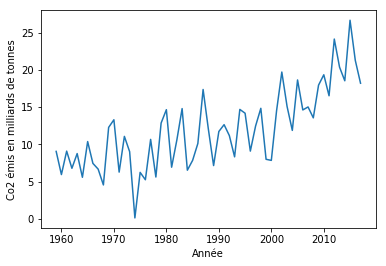

In [2]:
emissions = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['Em']]]
land_use = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['land-use']]]
Année = [int(i) for i in co2_data['Year']]
ocean_sink = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['oc']]]
land_sink = [float(j.replace(",", "."))*3.664 for j in [i for i in co2_data['land']]]

print(emissions[0] + land_use[0] - (ocean_sink[0] + land_sink[0]))
print(emissions[57] + land_use[57] - (ocean_sink[57] + land_sink[57]))

def calcul_co2_y(Le,Lu,L_oc,L_land,list_y):
    
    D = {}
    
    for i in range(0,len(Le)):
        Co2 = (Le[i] + Lu[i] - (L_oc[i] + L_land[i]))
        D[list_y[i]] = Co2
       
    list_Co2 = [i for i in D.values()]
    
    plt.plot(list_y , list_Co2)
    plt.xlabel('Année')
    plt.ylabel('Co2 émis en milliards de tonnes')
    
    return D

print(calcul_co2_y(emissions,land_use,ocean_sink,land_sink,Année))

In [3]:
def predict_em(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_em():
    
    X = Année
    Y = emissions
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Emissions')
    plt.xlabel('Année')
    plt.ylabel('Emissions de Co2 en Mt')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_em(slope, intercept, X), c='r')
    plt.show()   

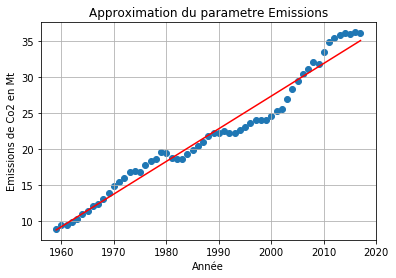

In [4]:
graph_em()

In [5]:
def predict_land_u(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_land_u():
    
    X = Année
    Y = land_use
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre land-use')
    plt.xlabel('Année')
    plt.ylabel('Utilisations Terres en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_land_u(slope, intercept, X), c='r')
    plt.show()

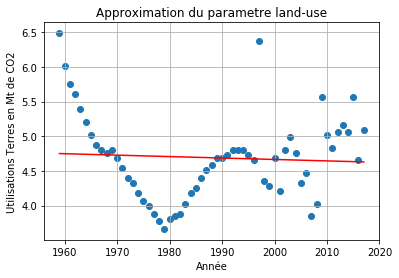

In [6]:
graph_land_u()

In [7]:
def predict_oc(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_oc():
    
    X = Année
    Y = ocean_sink
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre ocean_sink')
    plt.xlabel('Année')
    plt.ylabel('Absoption en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict_oc(slope, intercept, X), c='r')
    plt.show()

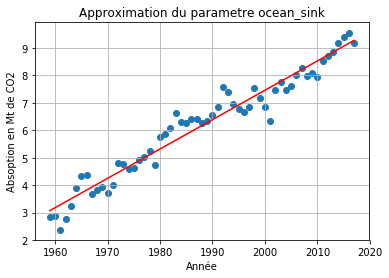

In [8]:
graph_oc()

In [9]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_land_s():
    
    X = Année
    Y = land_sink 
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre land_sink ')
    plt.xlabel('Année')
    plt.ylabel('Absoption en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

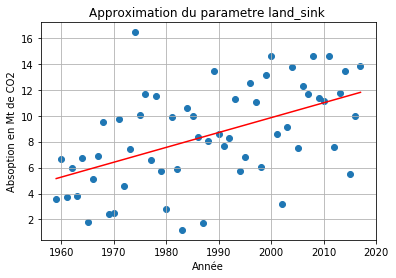

In [10]:
graph_land_s()

In [11]:
def predict_em(year):
    
    X = Année 
    Y = emissions    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept

def predict_land_u(year):
    
    X = Année 
    Y = land_use    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept

def predict_oc(year):
    
    X = Année 
    Y = ocean_sink  
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept

def predict_land_s(year):
    
    X = Année
    Y = land_sink     
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*year + intercept



def list_final(annee_final):
    
    X_Annee = [i for i in range(1959,annee_final)]
    Y_final = []
    
    for i in X_Annee:
        Y_final.append(predict_em(i) + predict_land_u(i) - predict_oc(i) - predict_land_s(i))
        
    return Y_final

def graph_final(annee_final):
    
    D = {}
    
    for i in range(0,len(emissions)):
        C = emissions[i] + land_use[i] - (ocean_sink[i] + land_sink[i])
        D[Année[i]] = C
       
    list_C = [i for i in D.values()]
    
    X_Annee = [i for i in range(1959,annee_final)]
    
    axes = plt.axes()
    axes.grid()
    plt.plot(Année , list_C)
    plt.xlabel('Année')
    plt.ylabel('Co2 émis en milliards de tonnes')
    
    plt.plot(X_Annee , list_final(annee_final), c='r')
    plt.show()
    
def valeur(annee_final):
    
    X_Annee = [i for i in range(1959,annee_final)]
    D = dict()
    
    for i in range(0, len(X_Annee)):
        
        D[X_Annee[i]] = list_final(annee_final)[i]
                   
    return D

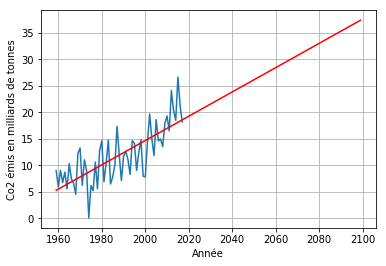

In [12]:
graph_final(2100)

In [13]:
valeur(2011)

{1959: 5.318451254237296,
 1960: 5.547604367036868,
 1961: 5.776757479836357,
 1962: 6.0059105926359315,
 1963: 6.235063705435419,
 1964: 6.464216818234991,
 1965: 6.693369931034482,
 1966: 6.922523043834055,
 1967: 7.151676156633513,
 1968: 7.380829269433086,
 1969: 7.609982382232602,
 1970: 7.839135495032178,
 1971: 8.06828860783175,
 1972: 8.297441720631209,
 1973: 8.526594833430813,
 1974: 8.7557479462303,
 1975: 8.984901059029873,
 1976: 9.214054171829332,
 1977: 9.443207284628933,
 1978: 9.672360397428395,
 1979: 9.901513510227996,
 1980: 10.130666623027484,
 1981: 10.35981973582706,
 1982: 10.588972848626518,
 1983: 10.818125961426091,
 1984: 11.047279074225607,
 1985: 11.276432187025183,
 1986: 11.505585299824642,
 1987: 11.734738412624214,
 1988: 11.963891525423705,
 1989: 12.193044638223306,
 1990: 12.422197751022765,
 1991: 12.651350863822337,
 1992: 12.880503976621938,
 1993: 13.1096570894214,
 1994: 13.338810202221001,
 1995: 13.56796331502046,
 1996: 13.797116427820065,
 

In [14]:
predict_em(2010) + predict_land_u(2010)

36.533729009935755

# II ) PAR CONTINENT : 

In [191]:
pd.read_csv('terri.csv', sep=' ')
terri = pd.read_csv('terri.csv', sep=' ')
pd.read_csv('land.csv', sep=' ')
land = pd.read_csv('land.csv', sep=' ')

NA_l = [ float(j) for j in [i.replace(",", ".") for i in land['N/A']]]
NA_t = [ float(j) for j in [i.replace(",", ".") for i in terri['N/A']]]
SA_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 1']]]
SA_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 1']]]
Asie_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 2']]]
Asie_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 2']]]
EU_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 3']]]
EU_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 3']]]
Oce_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 4']]]
Oce_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 4']]]
Afri_l = [ float(j) for j in [i.replace(",", ".") for i in land['Unnamed: 5']]]
Afri_t = [ float(j) for j in [i.replace(",", ".") for i in terri['Unnamed: 5']]]
Année_l = [ j for j in range(1960,2011)]
Année_t = [ j for j in range(1960,2018)]

In [210]:
def somme_graph_sink():
    
    X = Année
    Y1 = land_sink
    Y2 = ocean_sink
    Y = []
    
    for i in range(0, len(Y1)):
        Y.append(land_sink[i]+ocean_sink[i])
        
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation absorption ocean_sink + land_sink ')
    plt.xlabel('Année')
    plt.ylabel('Absoption en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    

def x():
    
    X = Année
    Y1 = land_sink
    Y2 = ocean_sink
    Y = []
    
    for i in range(0, len(Y1)):
        Y.append(land_sink[i]+ocean_sink[i])
        
    return Y

print(x()[59:65])

[6.412000000000001, 9.48976, 6.118880000000001, 8.68368, 6.998240000000001, 10.6256, 6.118880000000001, 9.48976, 10.55232, 13.300320000000001, 6.375360000000001, 6.2288, 13.70336, 9.379840000000002, 12.20112, 20.99472, 14.69264, 16.561280000000004, 11.614880000000001, 16.74448, 10.4424, 8.57376, 15.755200000000002, 11.94464, 7.840960000000001, 16.927680000000002, 16.26816, 14.72928, 8.13408, 14.2896, 19.785600000000002, 15.168960000000002, 14.546080000000002, 15.865120000000001, 18.686400000000003, 12.71408, 13.630080000000001, 19.16272, 17.916960000000003, 13.593440000000001, 20.298560000000002, 21.471040000000002, 14.94912, 10.69888, 16.891040000000004, 21.21456, 15.095680000000002, 20.3352, 19.932160000000003, 22.606880000000004, 19.455840000000002, 19.08944, 23.11984, 16.34144, 20.591680000000004, 22.606880000000004, 14.91248, 19.565759999999997, 23.04656]


In [211]:
len(x())

59

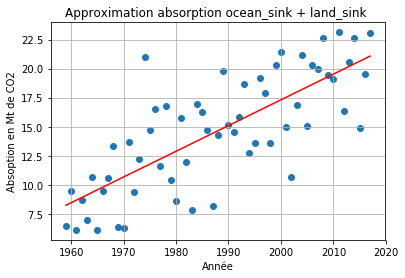

In [200]:
somme_graph_sink()

1. AMERIQUE DU NORD 

In [143]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_NA_l():
    
    X = Année_l
    Y = NA_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre NA_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land NA en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_NA_t():
    
    X = Année_t
    Y = NA_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre NA_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri NA en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

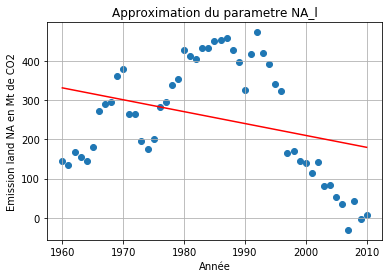

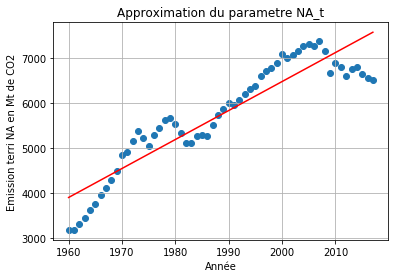

In [168]:
graph_NA_l()
graph_NA_t()

In [180]:
def x(an):
    
    X = Année_l
    Y = NA_l
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    
    return slope*an + intercept

NA_l_bis = [x(i) for i in range(2011,2018)]
NA_l_bis2 = NA_l + NA_l_bis

NA = [NA_l_bis2[i]+NA_t[i] for i in range(0,len(NA_t))]



In [162]:
def somme_graph_NA():
    
    X = [i for i in range(1960, 2010)]
    X_bis = [i for i in range(2011, 2018)]
    Y1 = NA_t
    Y2 = NA_l
    Y = []
    k = 2010
    
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(X, Y2)
    
    for i in range(0, len(X)):
        Y.append(Y1[i] + Y2[i])
        
    for e in range(len(X), len(X)+len(X_bis)):
        Y.append(Y2[e]+ predict(slope2, intercept2, k))
        k = k +1
    print(len(Y))
    

In [ ]:
axes = plt.axes()
    axes.grid()
    plt.title('Approximation absorption land_sink + land_sink ')
    plt.xlabel('Année')
    plt.ylabel('Absoption en Mt de CO2')
    plt.scatter((an,Y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(an, Y)
    plt.plot(an, predict(slope, intercept, X), c='r')
    plt.show()

In [163]:
somme_graph_NA()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
def somme_graph_NA():
    
    NA = 

In [133]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_SA_l():
    
    X = Année_l
    Y = SA_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre SA_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land SA en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_SA_t():
    
    X = Année_t
    Y = SA_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre SA_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri SA en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

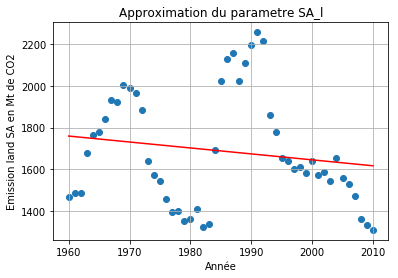

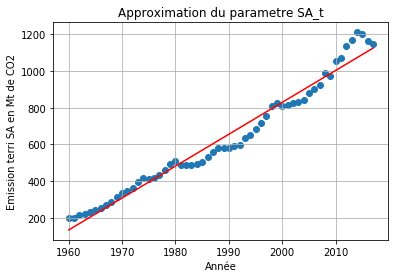

In [134]:
graph_SA_l()
graph_SA_t()

In [135]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Asie_l():
    
    X = Année_l
    Y = Asie_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Asie_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land Asie en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_Asie_t():
    
    X = Année_t
    Y = Asie_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Asie_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri Asie en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

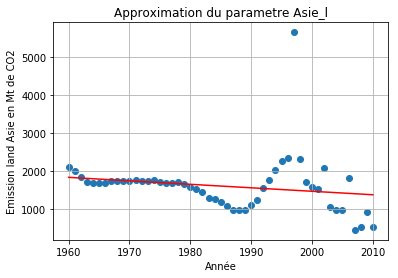

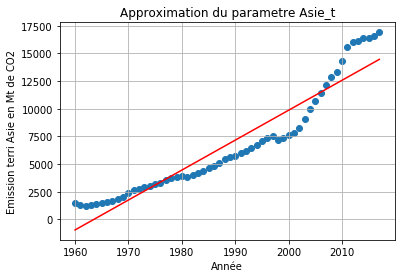

In [136]:
graph_Asie_l()
graph_Asie_t()

In [137]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_EU_l():
    
    X = Année_l
    Y = EU_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre EU_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land EU en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_EU_t():
    
    X = Année_t
    Y = EU_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre EU_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri EU en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

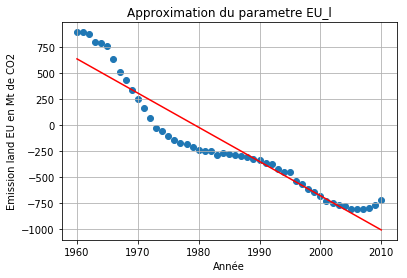

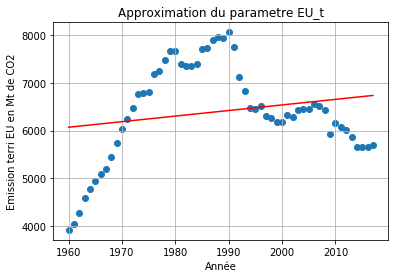

In [138]:
graph_EU_l()
graph_EU_t()

In [139]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Oce_l():
    
    X = Année_l
    Y = Oce_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Oce_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land Oce en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_Oce_t():
    
    X = Année_t
    Y = Oce_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Oce_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri Oce en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

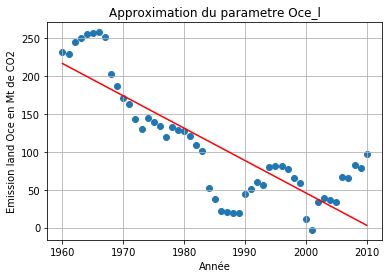

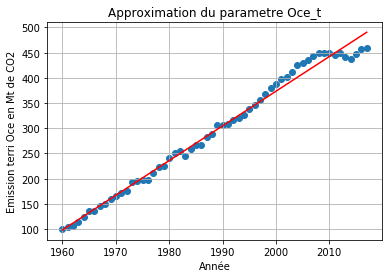

In [140]:
graph_Oce_l()
graph_Oce_t()

In [141]:
def predict(slope, intercept, x):
    
    return slope*np.asarray(x) + intercept

def graph_Afri_l():
    
    X = Année_l
    Y = Afri_l
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Afri_l')
    plt.xlabel('Année')
    plt.ylabel('Emission land Afri en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()
    
def graph_Afri_t():
    
    X = Année_t
    Y = Afri_t
    
    axes = plt.axes()
    axes.grid()
    plt.title('Approximation du parametre Afri_t')
    plt.xlabel('Année')
    plt.ylabel('Emission terri Afri en Mt de CO2')
    plt.scatter(X,Y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    plt.plot(X, predict(slope, intercept, X), c='r')
    plt.show()

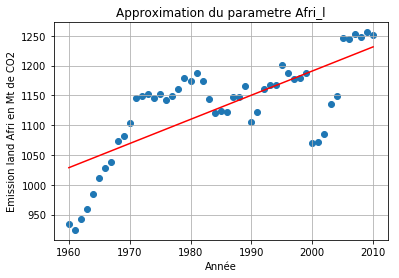

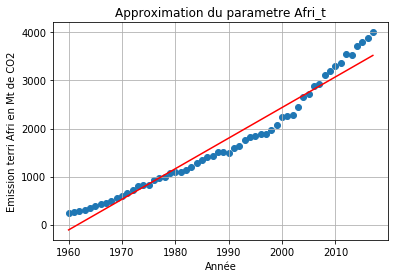

In [142]:
graph_Afri_l()
graph_Afri_t()